In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use(['science'])
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = "medium"
mpl.rcParams['ytick.labelsize'] = "medium"
mpl.rcParams['legend.fontsize'] = "large"
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['lines.linewidth'] = 1.5

In [2]:
def mctdh_data(fname):
    with open(fname) as f:
        lines = f.readlines()
    lines = [x.replace('D', 'E') for x in lines]    
    mctdh = np.loadtxt(lines)
    mctdh[:,0] *= 0.039292731
    return mctdh

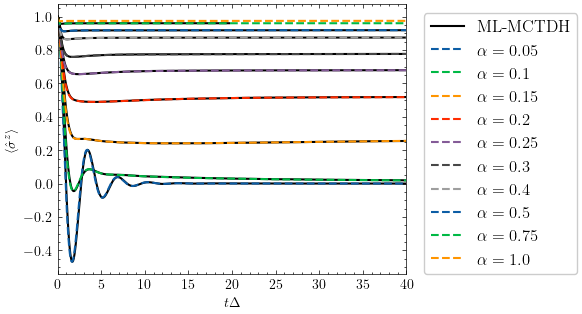

In [3]:
fig = plt.figure(figsize=(4.5,3.5))
fnames = {
    "005": "Fig1b/0.05.dat",
    "010": "Fig1b/0.1.dat",
    "015": "Fig1b/0.15.dat",
    "020": "Fig6b/0.2.dat",
    "025": "Fig6b/0.25.dat",
    "030": "Fig6b/0.3.dat",
    "040": "Fig6b/0.4.dat",
    "050": "Fig6b/0.5.dat",
    "075": "Fig7/20.dat"}

for alpha in ["005", "010", "015", "020", "025", "030", "040", "050", "075", "100"]:
    if alpha != "100":
        data = mctdh_data(f"expand_production/mctdh/xmgr_files/{fnames[alpha]}")
        if alpha == "005":
            label="ML-MCTDH"
        else:
            label=None
        plt.plot(data[:, 0], data[:, 1], color="black", zorder=-199, label=label)
        
    with open(f"expand_production/{alpha}.out") as fin:
        text = fin.readlines()
    res = []
    for line in text:
        if line[0] in ["0", "-"]:
            res.append(list(map(float, line.strip().split())))
    res_ref = np.array(res)
    plt.plot(np.arange(len(res_ref))*0.05, res_ref[:, 0], linestyle="--", label=r"$\alpha=" + str(float(alpha)/100) + "$")
    
    #plt.plot(res_ref[:, 1])
plt.xlim(0, 40)

plt.legend(loc=(1.05, 0.0))
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.savefig("subohmic.pdf")